In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [2]:
def percolate_decor(f):
    def wrapper(shape_x, shape_y, p):
        if wrapper.init:
            wrapper.init = False
            wrapper.mat = rand(shape_x, shape_y)
        mat = np.zeros(wrapper.mat.shape)
        for j in range(len(wrapper.mat)):
            for i in range(len(wrapper.mat[j])):
                mat[j][i] = 1 if wrapper.mat[j][i] < p else 0
        return mat
    wrapper.init = True
    return wrapper

@percolate_decor
def percolate(shape_x, shape_y, p):
    pass

In [3]:
def clasterize(A):
    mat = np.zeros(A.shape)
    maxL = 1
    def union(a, b):
        for i in range(len(mat)):
            for j in range(len(mat[i])):
                mat[i][j] = b if mat[i][j] == a else mat[i][j]
    for i in range(len(A)):
        for j in range(len(A[i])):
            if A[i][j]:
                if mat[i-1][j] == 0 and mat[i][j-1] == 0:
                    mat[i][j] = maxL
                    maxL += 1
                if mat[i-1][j] != 0 and mat[i][j-1] == 0:
                    mat[i][j] = mat[i-1][j]
                if mat[i-1][j] == 0 and mat[i][j-1] != 0:
                    mat[i][j] = mat[i][j-1]
                if mat[i-1][j] != 0 and mat[i][j-1] != 0:
                    union(mat[i-1][j], mat[i][j-1])
                    mat[i][j] = mat[i-1][j]
    return mat           

In [4]:
def vcoupled(A):
    T = set(A[0])
    B = set(A[-1])
    if T&B - {0.0} is None:
        return False
    else:
        return True

## Маркировка класстеров на решетке 16х16 с р=0.7 и нахождение соединяющего класстера

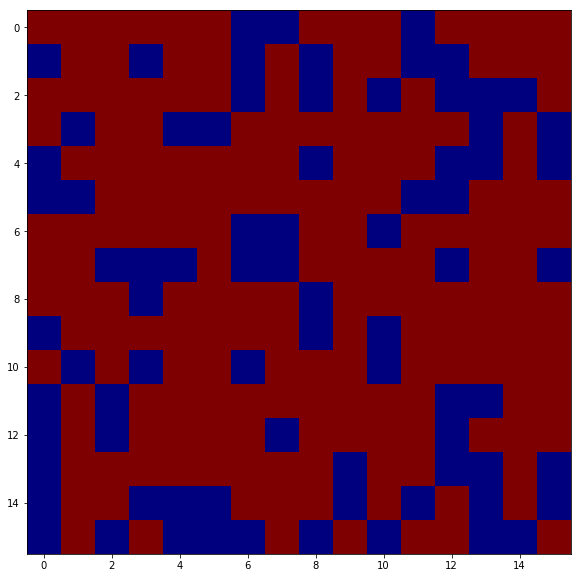

is vertical cupled? True


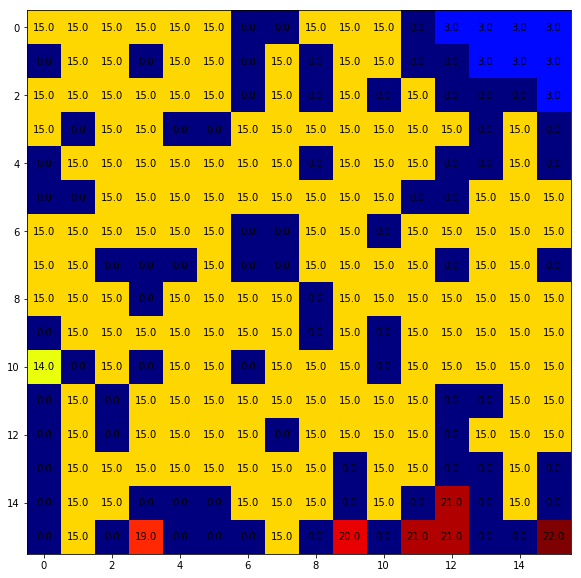

In [5]:
percolate.init = True
A = percolate(16,16,0.7)
plt.figure(figsize=(10,10))
plt.imshow(A, cmap=plt.cm.jet)
plt.show()

AL = clasterize(A)
print "is vertical cupled? {}".format(vcoupled(AL))
fig = plt.figure(figsize=(10,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(AL, cmap=plt.cm.jet)
for x in xrange(AL.shape[0]):
    for y in xrange(AL.shape[1]):
        ax.annotate(str(AL[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.imshow(AL, cmap=plt.cm.jet)
plt.show()
plt.close()

In [8]:
def count(A):
    labels = set()
    stat = dict()
    for row in AL:
        labels = labels | set(row)
    for label in list(labels):
        col = A.shape[0]*A.shape[1] - np.count_nonzero(AL - label)
        stat[label] = round(col*100.0 / float(A.shape[0]*A.shape[1]), 2)
    return stat

### Распределение класстеров в %: 

In [10]:
D = count(AL)
D

{0.0: 30.47,
 3.0: 3.13,
 14.0: 0.39,
 15.0: 63.67,
 19.0: 0.39,
 20.0: 0.39,
 21.0: 1.17,
 22.0: 0.39}